# How to select numerical input + categorical output features

In [1]:
# step 1:- load the datset
# step 2:- split the data set into train and test
# step 3:- prepare input and prepare output
# step 4:- use featue selection technique.

In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split

# step1:- load the data set
dataset=read_csv(r'C:\Users\Kumari Sapna\Desktop\python notebooks files\Data Preparation\Datasets\diabetesindian.csv', header=None)
data=dataset.values
# split into input and output
x = data[:, :-1]
y = data[:, -1]

# step2:- split the data set 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.33, random_state=1)
print('train', x_train.shape, y_train.shape)
print('test', x_test.shape, y_test.shape)


train (514, 8) (514,)
test (254, 8) (254,)


# ANOVA-F test feature selection

0 16.527384507997283
1 131.32556155744865
2 0.04237114636106755
3 1.4152155084602436
4 12.778966082794193
5 49.209523097359885
6 13.37714228723036
7 25.12643971427903


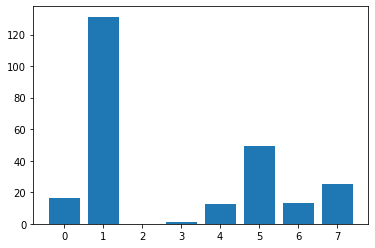

In [5]:
# in this section there is no need of step3 .
# it means it is already in numerical form so no need to change it .

# now using the feature selection technique in step 3

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# step1:- load the data set
dataset=read_csv(r'C:\Users\Kumari Sapna\Desktop\python notebooks files\Data Preparation\Datasets\diabetesindian.csv', header=None)
data=dataset.values
# split into input and output
x = data[:, :-1]
y = data[:, -1]

# step2:- split the data set 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.33, random_state=1)


# step 3:- using ANOVA-F test
fs=SelectKBest(score_func=f_classif, k='all')
fs.fit(x_train, y_train)
x_train_fs =fs.transform(x_train)
x_test_fs =fs.transform(x_test)
 # what are the scores for the features
for i in range (len(fs.scores_)):
    print(i, fs.scores_[i])

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


# Mutual information feature selection

0 0.027802290616104397
1 0.12138947253634758
2 0.023250136426278045
3 0.0
4 0.02796999932546096
5 0.0762395858640923
6 0.014558185623300135
7 0.04532680449317472


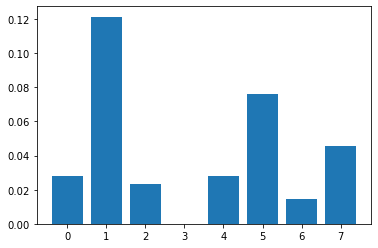

In [6]:
# now using the feature selection technique in step 3

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# step1:- load the data set
dataset=read_csv(r'C:\Users\Kumari Sapna\Desktop\python notebooks files\Data Preparation\Datasets\diabetesindian.csv', header=None)
data=dataset.values
# split into input and output
x = data[:, :-1]
y = data[:, -1]

# step2:- split the data set 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.33, random_state=1)


# step 3:- using mutual informaton test
fs=SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(x_train, y_train)
x_train_fs =fs.transform(x_train)
x_test_fs =fs.transform(x_test)
 # what are the scores for the features
for i in range (len(fs.scores_)):
    print(i, fs.scores_[i])

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


# Modeling using all features

In [7]:
# in this section we will check the accuracy by using logistic regression for all the features.

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# step1:- load the data set
dataset=read_csv(r'C:\Users\Kumari Sapna\Desktop\python notebooks files\Data Preparation\Datasets\diabetesindian.csv', header=None)
data=dataset.values
# split into input and output
x = data[:, :-1]
y = data[:, -1]

# step2:- split the data set 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.33, random_state=1)

# fit the model 
model= LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
# evaluate the model
yhat=model.predict(x_test)
# evaluate the predictions
accuracy=accuracy_score(y_test, yhat)
print(accuracy*100)

77.55905511811024


# Model built using ANOVA-F test features

In [19]:
# now we will use anova f test features to fit the model for checking the accuracy.

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# step1:- load the data set
dataset=read_csv(r'C:\Users\Kumari Sapna\Desktop\python notebooks files\Data Preparation\Datasets\diabetesindian.csv', header=None)
data=dataset.values
# split into input and output
x = data[:, :-1]
y = data[:, -1]

# step2:- split the data set 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.33, random_state=1)


# step 3:- using ANOVA-F test
fs=SelectKBest(score_func=f_classif, k='all')
fs.fit(x_train, y_train)
x_train_fs =fs.transform(x_train)
x_test_fs =fs.transform(x_test)
 

# fit the model 
model= LogisticRegression(solver='liblinear')
model.fit(x_train_fs, y_train)
# evaluate the model
yhat=model.predict(x_test_fs)
# evaluate the predictions
accuracy=accuracy_score(y_test, yhat)
print(accuracy*100)

77.55905511811024


# Model built using mutual information test features

In [20]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# step1:- load the data set
dataset=read_csv(r'C:\Users\Kumari Sapna\Desktop\python notebooks files\Data Preparation\Datasets\diabetesindian.csv', header=None)
data=dataset.values
# split into input and output
x = data[:, :-1]
y = data[:, -1]

# step2:- split the data set 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.33, random_state=1)


# step 3:- using mutual informaton test
fs=SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(x_train, y_train)
x_train_fs =fs.transform(x_train)
x_test_fs =fs.transform(x_test)

# fit the model 
model= LogisticRegression(solver='liblinear')
model.fit(x_train_fs, y_train)
# evaluate the model
yhat=model.predict(x_test_fs)
# evaluate the predictions
accuracy=accuracy_score(y_test, yhat)
print(accuracy*100)

77.55905511811024
